# Exploring who Hot Ones guests are

I've been a fan of Hot Ones for a long time. Sometime last year, I started to feel like I was haveing deja vu: was it just me, or was every episode a white guy? I decided to find out. 

Data was pulled from the Hot Ones episode page on YouTube and, along with specific field definitions, can be found here: https://docs.google.com/spreadsheets/d/1I1Pli8qzVnJ8cD8usamMesHI6YQ2fZJ2VuitAbRnEyc/edit?usp=sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read the data in
df = pd.read_csv('Guest List (1).csv')

In [3]:
#get general info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Guest Name        199 non-null    object 
 1   Gender            199 non-null    object 
 2   Race              199 non-null    object 
 3   Industry          199 non-null    object 
 4   Season            199 non-null    int64  
 5   Episode           199 non-null    int64  
 6   Unique Episode    199 non-null    float64
 7   Number of guests  199 non-null    int64  
 8   Episode Length    199 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 14.1+ KB


In [4]:
#explore the dataframe
print(df.shape)
df.head()

(199, 9)


,Guest Name,Gender,Race,Industry,Season,Episode,Unique Episode,Number of guests,Episode Length
0,Tony Yayo,Male,Black,Music,1,1,1.1,1,320
1,Anthony Rizzo,Male,White,Sports,1,2,1.2,1,618
2,Machine Gun Kelly,Male,White,Music,1,3,1.3,1,917
3,Gunplay,Male,Black,Music,1,4,1.4,1,898
4,Ja Rule,Male,Black,Music,1,5,1.5,1,1109


In [5]:
#clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['guest_name', 'gender', 'race', 'industry', 'season', 'episode',
       'unique_episode', 'number_of_guests', 'episode_length'],
      dtype='object')

In [6]:
#check that things look right
df.head()

,guest_name,gender,race,industry,season,episode,unique_episode,number_of_guests,episode_length
0,Tony Yayo,Male,Black,Music,1,1,1.1,1,320
1,Anthony Rizzo,Male,White,Sports,1,2,1.2,1,618
2,Machine Gun Kelly,Male,White,Music,1,3,1.3,1,917
3,Gunplay,Male,Black,Music,1,4,1.4,1,898
4,Ja Rule,Male,Black,Music,1,5,1.5,1,1109


### The biggest diversity gap on Hot Ones is gender, not race

After getting the dataframe set up and ready to go, I started first on the question of gender because I suspected that was where the main diversity gap was. Hot Ones has a lot of hip-hop artists one, who are predominlack, so I wanted to look at gender first. 

I used Matplotlib, just to make it as difficult as possible to get the styling right, and explored total gender counts and gender count by season.

Here's what I found:

In [9]:
#How many total guests are there, through Season 11? 
print('There have been ' + str(df['guest_name'].count()) + ' guests through 11 seasons')

#How many different episodes have there been? 
print('With ' + str(df.unique_episode.nunique()) + ' guests')

There have been 199 guests through 11 seasons
With 170 guests


In [60]:
#turn gender counts into an object we can easily plot
gencount = df['gender'].value_counts()



In [11]:
#use a style that matches the Hot Ones asthetics
plt.style.use('dark_background')

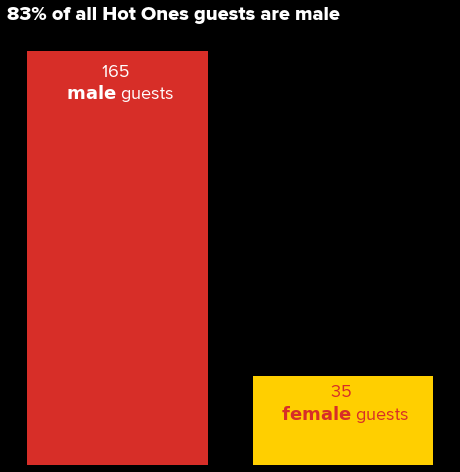

In [12]:
#chart overall guests

#create the axis and subplot
fig, ax = plt.subplots(figsize=(8, 8))

#foundation chart
ax = plt.bar(gencount.index, gencount, color=['#d72e28','#ffcf00'])

#yellow from hot ones logo: #ffcf00
# red from hot ones logo: #d72e28


#styling -- title
_ = plt.title('83% of all Hot Ones guests are male', loc='left', pad=10,
          fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

#styling -- labels
_ = plt.text(1,18, '35 \n ' + r"$\bf{female}$" + ' guests',
         fontsize=18, ha='center', fontname='Proxima Nova', fontweight='normal', color='#d72e28')
_ = plt.text(0,145, '165 \n ' + r"$\bf{male}$" + ' guests',
         fontsize=18, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')

#styling -- ticks and axes
_ = plt.xticks(fontsize=14, fontname='Proxima Nova', fontweight='normal', color='white')
_ =  plt.yticks([])
_ = plt.axis('off')

In [61]:
#read in male/female gender data
genseason = pd.read_csv('Hot Ones Guests - GuestGender.csv')
genseason.dropna(inplace=True) # drop NaN columns


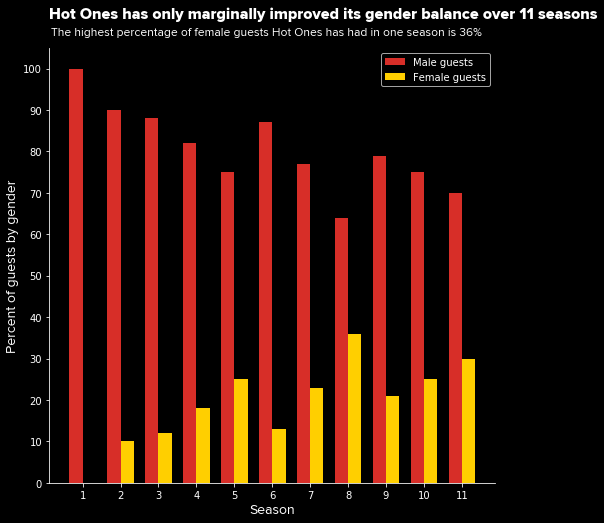

In [54]:

#for tick positions and labels
szn = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 
indx = np.arange(len(szn))
score_label = np.arange(0,109,10)

#data
male = genseason.loc[genseason['gender'] == 'Male']['percent']
female = genseason.loc[genseason['gender'] == 'Female']['percent']

barWidth = 0.35

fig, ax = plt.subplots(figsize=(8, 8))


# Make the plot
barMale = ax.bar(indx - barWidth/2, male, color='#d72e28', width=barWidth, label='Male guests')
barFemale = ax.bar(indx + barWidth/2, female, color='#ffcf00', width=barWidth, label='Female guests')
 
# Styling -- ticks and lables
_ = ax.set_xticks(indx)
_ = ax.set_xticklabels(szn)

_ = ax.set_xlabel('Season', fontsize=14, fontname='Proxima Nova')

_ = ax.set_yticks(score_label)
_ = ax.set_yticklabels(score_label)
_ = ax.set_ylabel('Percent of guests by gender', fontsize=14, fontname='Proxima Nova')


#set title and subtitle
_ = plt.title('Hot Ones has only marginally improved its gender balance over 11 seasons', loc='left', pad=30,
          fontdict={'fontsize':16, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

_ = plt.text(-.83,108,'The highest percentage of female guests Hot Ones has had in one season is 36%',
         fontsize=12, ha='left', fontname='Proxima Nova', fontweight='normal', color='white')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = plt.legend()

## Part two: Screentime was proportional to guest count

So now that we know Hot Ones has a heavy gender imbalance (it's also worth noting: Hot Ones has had zero non-binary or gender non-conforming guests), I wanted to look at *actual screentime* which I felt was more representative of true diversity. What good does it do you to have 75% of your guests be Black if those episodes are correspondingly shorter? I didn't really think that was the case, but wanted to dig in to find out. 

First, I wanted to explore how many episodes per season there have been and how much total runtime per season there is.

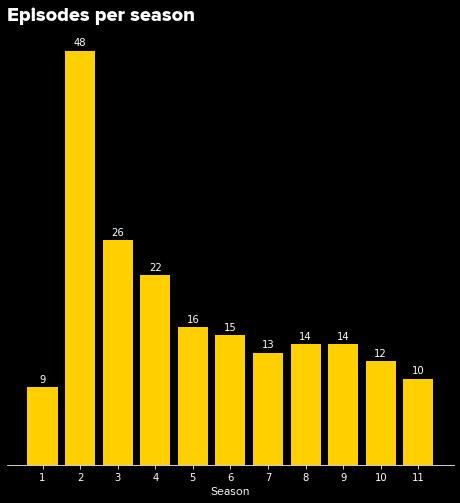

In [17]:
#group data & count
eps = df.groupby('season')['episode'].count()

fig, ax = plt.subplots(figsize=(8,8))

barWidth = 0.30

#make foundational bar
szn_ep_count = ax.bar(indx, eps, color='#ffcf00')

#Styling -- ticks and labels
_ = ax.set_xticks(indx)
_ = ax.set_xticklabels(szn)
_ = ax.set_xlabel('Season', fontsize=12, fontname='Proxima Nova')
_ = ax.set_yticks([])

#title
_ = plt.title('Episodes per season', loc='left', pad=10,
          fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


#for loop to annotate each bar
def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

insert_data_labels(szn_ep_count)

In [63]:
#create minutes and hours columns
df['episode_minutes'] = df['episode_length'] / 60 
df['episode_hours'] = df['episode_length'] / 3600
avg_ep_length = df.groupby('season').episode_minutes.mean()
season_length = df.groupby('season').episode_hours.sum()


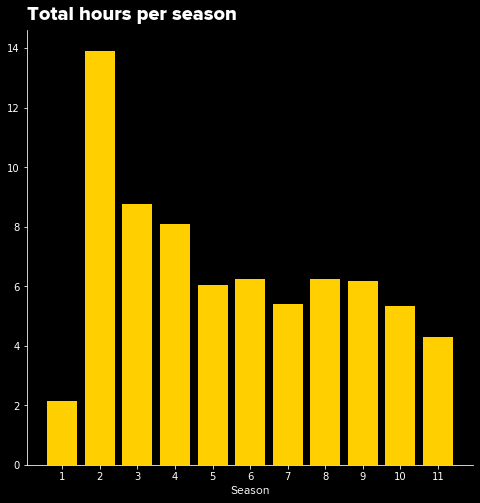

In [21]:
#create plot
fig, ax = plt.subplots(figsize=(8,8))
barWidth = 0.30

#create chart
szn_ep_count = ax.bar(indx, season_length, color='#ffcf00')


#Styling -- ticks, labels, title
_ = ax.set_xticks(indx)
_ = ax.set_xticklabels(szn)
_ = ax.set_xlabel('Season', fontsize=12, fontname='Proxima Nova')

_ = plt.title('Total hours per season', loc='left', pad=10,
          fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

#turn axes off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Season 2 was a high point (and outlier) in terms of total episodes and total screentime, but things have been generally trending downwards since then. As a fan, you can see the increase in quality over seasons. 

Did the average episode get longer, as the number of episodes per season declined? Yep!

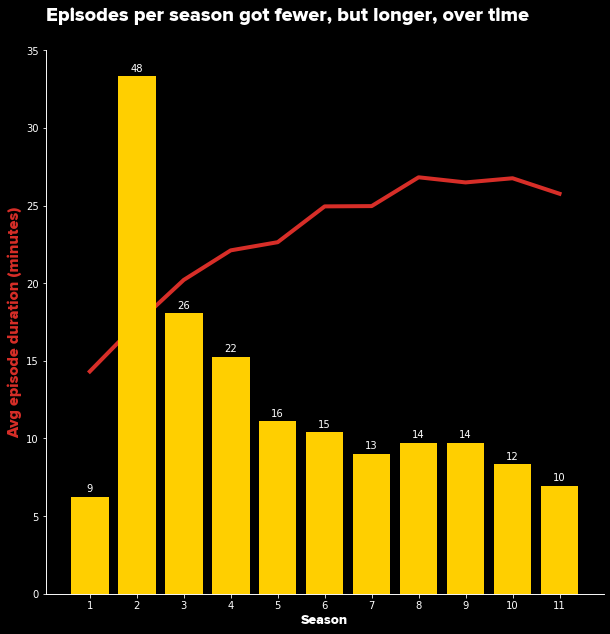

In [55]:
#create figure and dual axis
fig, ax1 = plt.subplots(figsize=(10,10))
ax2 = ax1.twinx()

#create both plots
ax1.plot(indx, avg_ep_length, color='#d72e28', linewidth=4)
szn_ep_count = ax2.bar(indx, eps, color='#ffcf00')

barWidth = 0.30


#Styling -- set labels and ticks across both axes
_ = ax1.set_xticks(indx)
_ = ax1.set_xticklabels(szn)
_ = ax1.set_xlabel('Season', fontsize=14, fontname='Proxima Nova', fontweight='bold')
y_indx_label = np.arange(0,37,5)
_ = ax1.set_yticks(y_indx_label)

ax1.set_ylabel('Avg episode duration (minutes)', fontsize=16, fontname='Proxima Nova', color='#d72e28', fontweight='bold')
ax2.set_yticks([])


#title
_ = plt.title('Episodes per season got fewer, but longer, over time', loc='left', pad=30,
          fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

#annotate bars
def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

insert_data_labels(szn_ep_count)


#turn spines off
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

As an aside, I was just curious which episodes were longest, and which were shortest:

In [22]:
#which are the longest episodes?

longest_eps = df.sort_values(by='episode_minutes', ascending=False)[['guest_name','episode_minutes']].iloc[0:5]
print('The 5 longest episodes are:')
print(longest_eps)

The 5 longest episodes are:
                  guest_name  episode_minutes
134            Jeff Goldblum        32.583333
46                 Tony Hawk        31.566667
158                     Shaq        31.166667
149            Gordon Ramsey        31.016667
176  Stone Cold Steve Austin        30.733333


In [23]:
#which are the shortest episodes?

shortest_eps = df.sort_values(by='episode_minutes', ascending=True)[['guest_name', 'episode_minutes']].iloc[0:5]
print('The 5 shortest episodes are:')
print(shortest_eps)

The 5 shortest episodes are:
        guest_name  episode_minutes
43  Nadeska Alexis         4.816667
42     Emily Oberg         4.816667
0        Tony Yayo         5.333333
37     Chili Klaus         8.100000
1    Anthony Rizzo        10.300000


In [62]:
#create series for screentime by gender

total_gender_hours = df.groupby('gender').episode_hours.sum()
total_gender_hours.sort_values(ascending=False, inplace=True)


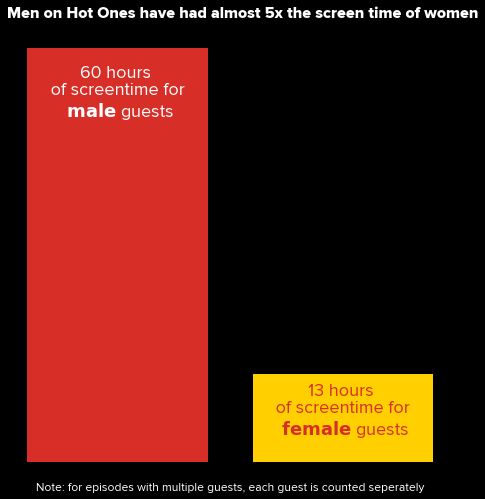

In [56]:
#create figure
fig, ax = plt.subplots(figsize=(8,8))

barWidth = 0.30

#make chart
gen_hrs = plt.bar(total_gender_hours.index, total_gender_hours, color=['#d72e28','#ffcf00'])


#title
_ = plt.title('Men on Hot Ones have had almost 5x the screen time of women', loc='left', pad=10,
          fontdict={'fontsize':16, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

#Labels and annotations
_ = plt.text(0,50, '60 hours \n ' + 'of screentime for \n ' + r"$\bf{male}$" + ' guests',
          fontsize=18, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')

_ = plt.text(1,4, '13 hours \n ' + 'of screentime for \n ' + r"$\bf{female}$" + ' guests',
          fontsize=18, ha='center', fontname='Proxima Nova', fontweight='normal', color='#d72e28')


_ = plt.text(0.5,-4, 'Note: for episodes with multiple guests, each guest is counted seperately',
          fontsize=12, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')


#turn spines off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = plt.axis('off')


The amount of screentime men have is about proportional how many male guests there have been, i.e. episodes featuring male guests aren't particularly longer or shorter than episodes featuring female guests, there are just more such episodes. 

I was immediately curious if the same was true for race. It is:

In [65]:
#create series for screentime by race

total_race_hours = df.groupby('race').episode_hours.sum()
total_race_hours.sort_values(ascending=False, inplace=True)

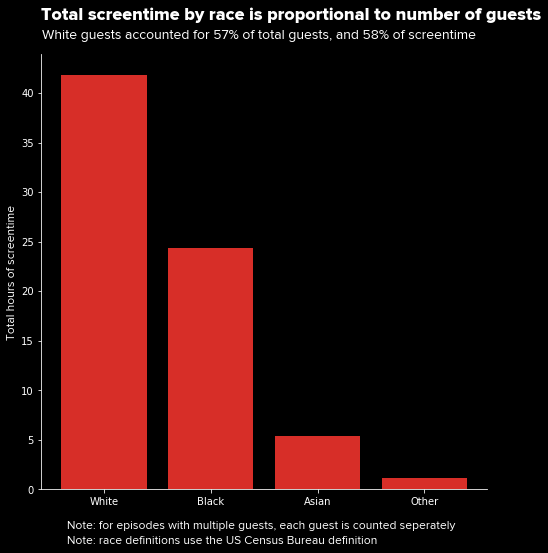

In [28]:
#create figure
fig, ax = plt.subplots(figsize=(8,8))
barWidth = 0.20


#make bar chart
gen_hrs = plt.bar(total_race_hours.index, total_race_hours, color='#d72e28') #color=['#d72e28','#ffcf00']


#title, sub-title and annotations
_ = plt.title('Total screentime by race is proportional to number of guests', loc='left', pad=35,
          fontdict={'fontsize':18, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

_ = plt.text(1.47,45.5, 'White guests accounted for 57% of total guests, and 58% of screentime ',
          fontsize=14, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')

_ = plt.text(1.47,-4, 'Note: for episodes with multiple guests, each guest is counted seperately',
          fontsize=12, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')

_ = plt.text(1.111,-5.5, 'Note: race definitions use the US Census Bureau definition',
          fontsize=12, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')


#y_label
ax.set_ylabel('Total hours of screentime', fontsize=12, ha='center', fontname='Proxima Nova')


#hides spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Part 3: Racial diversity is also lacking, but only in certain areas

While the majority of guests on Hot Ones are white, the real drop off in racial diversity comes with guests who are neither white nor black. Of 199 total guests through 11 season, only 18 have been Asian or Hispanic. Moreover, two of the Asian guests, Joji and Rich Brian, each appeared twice. 

When I explored racial makeup by season, it was also clear that Hot Ones hasn't improved much in that respect.

In [66]:
#create series for total guests by race

racecount = df['race'].value_counts()

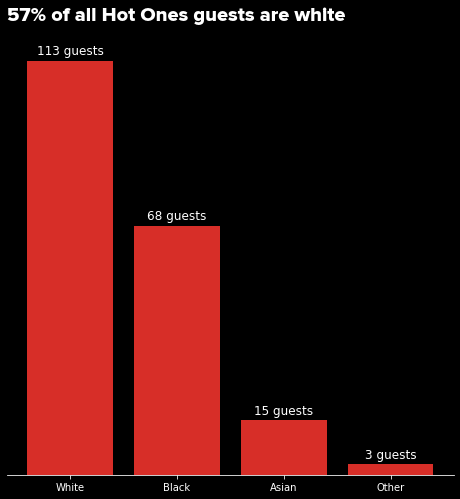

In [57]:
#create the axis and subplot
fig, ax = plt.subplots(figsize=(8, 8))

#foundation chart
race_bar = plt.bar(racecount.index, racecount, color='#d72e28')



#styling
_ = plt.title('57% of all Hot Ones guests are white', loc='left', pad=20,
          fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

#label data
def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f} guests'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom', 
            fontsize=12
        )
insert_data_labels(race_bar)

#hide ticks
_ =  plt.yticks([])

#hide spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


In [68]:
#read in csv and then test df to create series on percent of guests by race by season

guest_race = pd.read_csv('Hot Ones Guests - Guest Race.csv')
guest_race = guest_race.round(decimals=0) #need to round decimals down from the orginal dataset


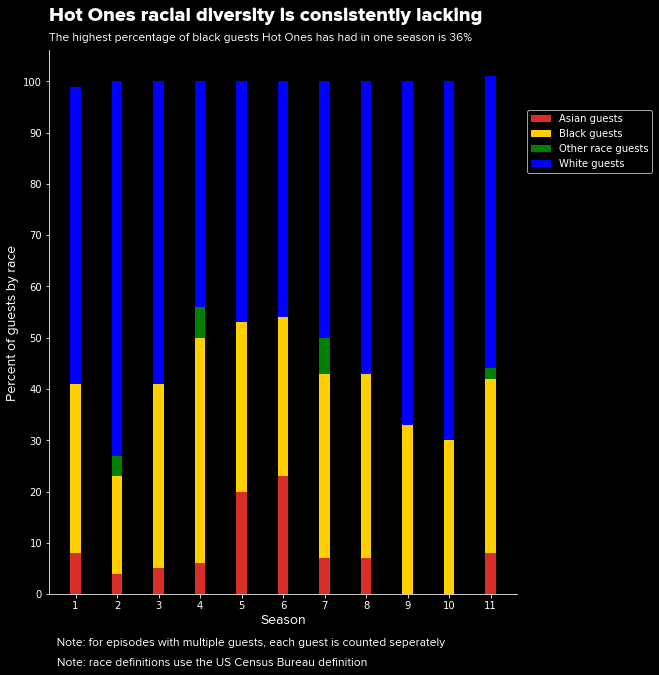

In [69]:
#for tick positions and labels

szn = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
indx = np.arange(len(szn))
score_label = np.arange(0,109,10)

#create slices of data for each race
asian = guest_race.loc[:,'Asian']
black = guest_race.loc[:,'Black']
other = guest_race.loc[:,'Other']
white = guest_race.loc[:,'White']

barWidth = 0.25

#make the figure
fig, ax = plt.subplots(figsize=(10,10))


# Make the plot
barAsian = ax.bar(indx, asian, color='#d72e28', width=barWidth, label='Asian guests')
barBlack = ax.bar(indx, black, color='#ffcf00', width=barWidth, label='Black guests', bottom=asian)
barOther = ax.bar(indx, other, color='green', width=barWidth, label='Other race guests', bottom=black+asian)
barWhite = ax.bar(indx, white, color='blue', width=barWidth, label='White guests', bottom=other+black+asian)
 
# Styling -- ticks and labels
_ = ax.set_xticks(indx)
_ = ax.set_xticklabels(szn)

_ = ax.set_xlabel('Season', fontsize=14, fontname='Proxima Nova')

_ = ax.set_yticks(score_label)
_ = ax.set_yticklabels(score_label)
_ = ax.set_ylabel('Percent of guests by race', fontsize=14, fontname='Proxima Nova')


#styling -- title, subtitle, and annotations

_ = plt.title('Hot Ones racial diversity is consistently lacking', loc='left', pad=30,
          fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova'
             , color='white')

_ = plt.text(-.65,108,'The highest percentage of black guests Hot Ones has had in one season is 36%',
             fontsize=12, ha='left', fontname='Proxima Nova', fontweight='normal', color='white')

_ = plt.text(4,-10, '      Note: for episodes with multiple guests, each guest is counted seperately',
          fontsize=12, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')

_ = plt.text(3.3,-14, 'Note: race definitions use the US Census Bureau definition',
          fontsize=12, ha='center', fontname='Proxima Nova', fontweight='normal', color='white')

#hide spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#adjust subplot size to fit legend
plt.subplots_adjust(left=0.1, right=0.75)
_ = plt.legend(loc='best', bbox_to_anchor=(1.3, 0.9))

Hot Ones does a decent job of having Black voices on its show, but overall, it has a lot of work to do to be truly diverse. 